In [1]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, ConvLSTM2D, MaxPooling2D, Dropout, TimeDistributed, Conv2D, Reshape, Embedding, Permute,UpSampling2D,RepeatVector
from tensorflow.keras.layers import LSTM
from tensorflow.keras.losses import categorical_crossentropy, mse, binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
main_dir = "/fruit classification/dataset"
os.listdir(main_dir)

['test', 'train']

In [3]:
test_dir = main_dir + '/test'
os.listdir(test_dir)

['Apple Golden 1',
 'Apple Red 1',
 'Banana',
 'Guava',
 'Kiwi',
 'Mango',
 'Mango Red',
 'Orange',
 'Pineapple',
 'Watermelon']

In [4]:
train_dir = main_dir + '/train'
os.listdir(train_dir)

['Apple Golden 1',
 'Apple Red 1',
 'Banana',
 'Guava',
 'Kiwi',
 'Mango',
 'Mango Red',
 'Orange',
 'Pineapple',
 'Watermelon']

In [5]:
# Creating a data generator
train = ImageDataGenerator(
        rescale=1./255, 
        horizontal_flip = True, 
        vertical_flip = True, 
        validation_split = 0.2)
train_datagen = train.flow_from_directory(
        train_dir,
        batch_size=32,
        target_size=(128,128),
        class_mode='sparse',
        subset = 'training')
val_datagen = train.flow_from_directory(
        train_dir,
        batch_size=32,
        target_size=(128,128),
        class_mode='sparse',
        subset = 'validation')


# Printing the training set
train_labels = (train_datagen.class_indices)
print(train_labels)



Found 3824 images belonging to 10 classes.
Found 954 images belonging to 10 classes.
{'Apple Golden 1': 0, 'Apple Red 1': 1, 'Banana': 2, 'Guava': 3, 'Kiwi': 4, 'Mango': 5, 'Mango Red': 6, 'Orange': 7, 'Pineapple': 8, 'Watermelon': 9}


In [6]:
# Create a data generator
test_datagen = ImageDataGenerator(
  rescale=1./255,
    horizontal_flip = True,
    vertical_flip = True
)
test_datagen = test_datagen.flow_from_directory(
        test_dir,
        batch_size=32,
        target_size=(128,128),
        class_mode='sparse')

# Printing the test set
test_labels = (test_datagen.class_indices)
print(test_labels)

Found 1603 images belonging to 10 classes.
{'Apple Golden 1': 0, 'Apple Red 1': 1, 'Banana': 2, 'Guava': 3, 'Kiwi': 4, 'Mango': 5, 'Mango Red': 6, 'Orange': 7, 'Pineapple': 8, 'Watermelon': 9}


In [7]:

for image_batch, label_batch in train_datagen:
    break
image_batch.shape, label_batch.shape

((32, 128, 128, 3), (32,))

In [8]:
model=Sequential()
model.add(Conv2D(32, kernel_size = (3,3), 
                 padding='same',
                 input_shape=(128,128,3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(64, kernel_size = (3,3), 
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
#model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.output_shape
model.add(RepeatVector(16))
model.add(LSTM(64,activation='tanh',return_sequences=False))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(6,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                4194368   
_________________________________________________________________
dropout (Dropout)            (None, 64)                0

In [9]:
model.compile(optimizer = 'Adam',loss = 'mse' , metrics=['accuracy'])


In [10]:

trained_model = model.fit(train_datagen, epochs=20, 
                          batch_size = 32, 
                           validation_data=val_datagen,
                           verbose = 1)


Epoch 1/20
120/120 [==============================] - 76s 618ms/step - loss: 20.6906 - accuracy: 0.0960 - val_loss: 20.3743 - val_accuracy: 0.0975
Epoch 2/20
120/120 [==============================] - 76s 630ms/step - loss: 20.3751 - accuracy: 0.0991 - val_loss: 20.3621 - val_accuracy: 0.0975
Epoch 3/20
120/120 [==============================] - 76s 630ms/step - loss: 20.3664 - accuracy: 0.1119 - val_loss: 20.3587 - val_accuracy: 0.0975
Epoch 4/20
120/120 [==============================] - 79s 654ms/step - loss: 20.3633 - accuracy: 0.1012 - val_loss: 20.3572 - val_accuracy: 0.0975
Epoch 5/20
120/120 [==============================] - 76s 629ms/step - loss: 20.3617 - accuracy: 0.1038 - val_loss: 20.3563 - val_accuracy: 0.0975
Epoch 6/20
120/120 [==============================] - 76s 631ms/step - loss: 20.3608 - accuracy: 0.1036 - val_loss: 20.3558 - val_accuracy: 0.0975
Epoch 7/20
120/120 [==============================] - 76s 630ms/step - loss: 20.3602 - accuracy: 0.0952 - val_loss: 20

In [11]:
model_dir = '/Fruit Classification/Model/model2a.h5'
model.save(model_dir)

In [12]:
from tensorflow import keras
model = keras.models.load_model(model_dir)

Accuracy: 99.99822974205017%
Output: Kiwi


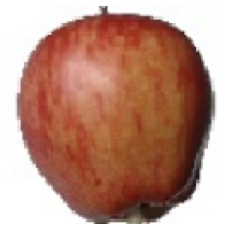

In [13]:
#test 1

from tensorflow.keras.preprocessing import image
import numpy as np
test_img = test_dir + '/Apple Red 1/3_100.jpg'
img = image.load_img(test_img, target_size = (128,128))
img_array = image.img_to_array(img)
img_array = np.array(img_array)/255.0

# Getting the labels
labels = dict((value,key) for key, value in train_labels.items())
predictions = model.predict(img_array[np.newaxis, ...])

# Displaying the output
acc = np.max(predictions[0]) * 100
print(f'Accuracy: {acc}%')
result = labels[np.argmax(predictions[0], axis = -1)]
print(f'Output: {result}')

plt.axis('off')
plt.imshow(img)

Accuracy: 99.99822974205017%
Output: Kiwi


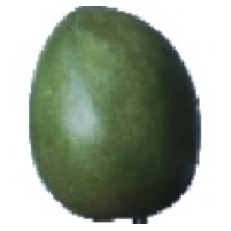

In [14]:
#test 2

from tensorflow.keras.preprocessing import image
import numpy as np
test_img = test_dir + '/Mango/3_100.jpg'
img = image.load_img(test_img, target_size = (128,128))
img_array = image.img_to_array(img)
img_array = np.array(img_array)/255.0

# Getting the labels
labels = dict((value,key) for key, value in train_labels.items())
predictions = model.predict(img_array[np.newaxis, ...])

# Displaying the output
acc = np.max(predictions[0]) * 100
print(f'Accuracy: {acc}%')
result = labels[np.argmax(predictions[0], axis = -1)]
print(f'Output: {result}')

plt.axis('off')
plt.imshow(img)

Accuracy: 99.99822974205017%
Output: Kiwi


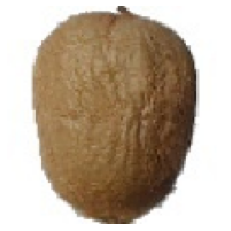

In [15]:
#test 2

from tensorflow.keras.preprocessing import image
import numpy as np
test_img = test_dir + '/Kiwi/3_100.jpg'
img = image.load_img(test_img, target_size = (128,128))
img_array = image.img_to_array(img)
img_array = np.array(img_array)/255.0

# Getting the labels
labels = dict((value,key) for key, value in train_labels.items())
predictions = model.predict(img_array[np.newaxis, ...])

# Displaying the output
acc = np.max(predictions[0]) * 100
print(f'Accuracy: {acc}%')
result = labels[np.argmax(predictions[0], axis = -1)]
print(f'Output: {result}')

plt.axis('off')
plt.imshow(img)

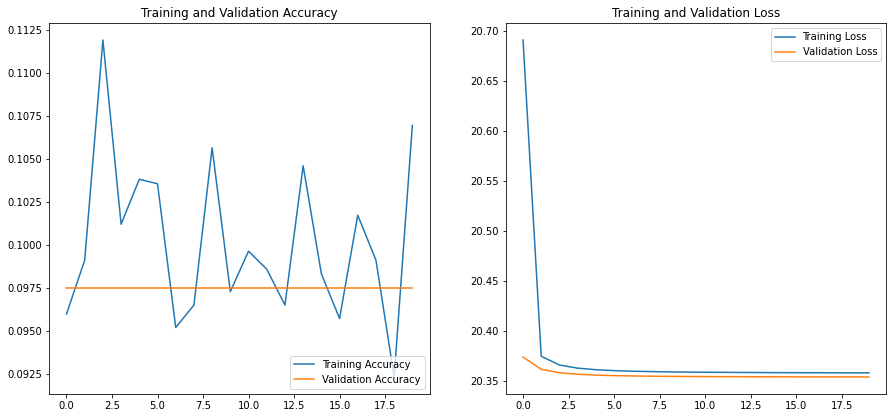

In [17]:
acc = trained_model.history['accuracy']
val_acc = trained_model.history['val_accuracy']
loss = trained_model.history['loss']
val_loss = trained_model.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()